# Hands-On Grafos
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ohtar10/icesi-advanced-dl/blob/main/Unidad%202%20-%20Graph%20Neural%20Networks/graphs.ipynb)

En este notebook encontraremos ejemplos básicos de grafos en python con la librería `networkx` que nos permitirá además visualizarlos. Lo anterior a manera de ejemplo.

#### Referencias
- [Hands-On Graph Neural Networks Using Python Chapter 2](https://github.com/PacktPublishing/Hands-On-Graph-Neural-Networks-Using-Python/blob/main/Chapter02/chapter2.ipynb)

In [5]:
import pkg_resources
import warnings

warnings.filterwarnings('ignore')

installed_packages = [package.key for package in pkg_resources.working_set]
IN_COLAB = 'google-colab' in installed_packages

In [6]:
!test '{IN_COLAB}' = 'True' && pip install networkx matplotlib

### Grafo Aciclico no dirigido


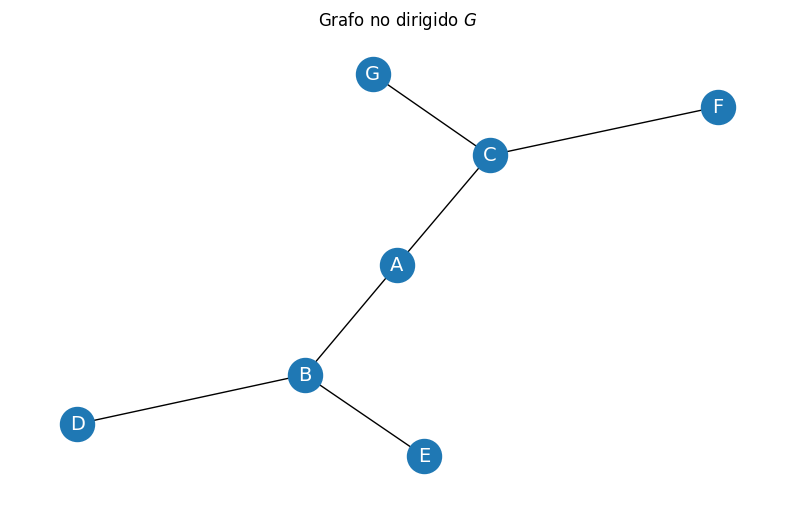

In [66]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

fig = plt.figure(figsize=(10, 6))
plt.axis('off')
plt.title("Grafo no dirigido $G$")
nx.draw_networkx(
    G,
    pos=nx.spring_layout(G, seed=1),
    node_size=600,
    cmap='coolwarm',
    font_size=14,
    font_color='white'
)

G_adj = pd.DataFrame(nx.to_numpy_array(G))
G_adj.index = pd.Series(list('ABCDEFG'))
G_adj.rename(columns={k:v for k, v in zip(range(7), 'ABCDEFG')}, inplace=True)

### Matriz de adjacencia para el grafo no dirigido G

In [30]:
G_adj

,A,B,C,D,E,F,G
A,0.0,1.0,1.0,0.0,0.0,0.0,0.0
B,1.0,0.0,0.0,1.0,1.0,0.0,0.0
C,1.0,0.0,0.0,0.0,0.0,1.0,1.0
D,0.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,1.0,0.0,0.0,0.0,0.0,0.0
F,0.0,0.0,1.0,0.0,0.0,0.0,0.0
G,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Grafo Aciclico Dirigido (DAG)

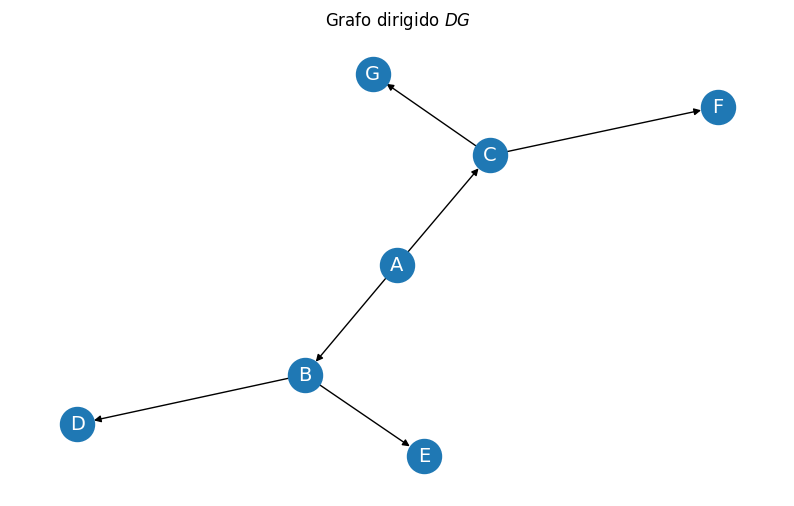

In [67]:
DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

fig = plt.figure(figsize=(10, 6))
plt.axis('off')
plt.title("Grafo dirigido $DG$")
nx.draw_networkx(
    DG,
    pos=nx.spring_layout(G, seed=1),
    node_size=600,
    cmap='coolwarm',
    font_size=14,
    font_color='white'
)
DG_adj = pd.DataFrame(nx.to_numpy_array(DG))
DG_adj.index = pd.Series(list('ABCDEFG'))
DG_adj.rename(columns={k:v for k, v in zip(range(7), 'ABCDEFG')}, inplace=True)

### Matriz de adyacencia para grafo dirigido DG

In [32]:
DG_adj

,A,B,C,D,E,F,G
A,0.0,1.0,1.0,0.0,0.0,0.0,0.0
B,0.0,0.0,0.0,1.0,1.0,0.0,0.0
C,0.0,0.0,0.0,0.0,0.0,1.0,1.0
D,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Grafo con conexiones de peso

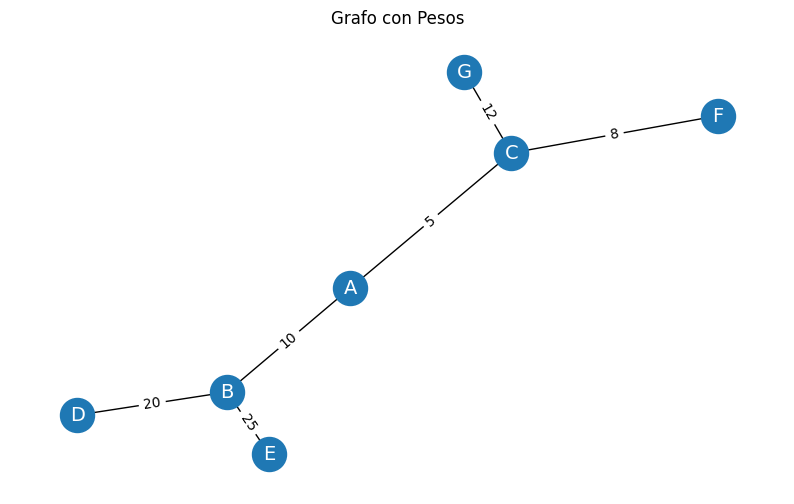

In [70]:
WG = nx.Graph()

WG.add_edges_from([
    ('A', 'B', {'weight': 10}), 
    ('A', 'C', {'weight': 5}), 
    ('B', 'D', {'weight': 20}), 
    ('B', 'E', {'weight': 25}), 
    ('C', 'F', {'weight': 8}), 
    ('C', 'G', {'weight': 12})]
    )
labels = nx.get_edge_attributes(WG, 'weight')

fig = plt.figure(figsize=(10, 6))
plt.axis('off')
plt.title("Grafo con Pesos")
nx.draw_networkx(
    WG,
    pos=nx.spring_layout(WG, seed=1),
    node_size=600,
    cmap='coolwarm',
    font_size=14,
    font_color='white'
)

nx.draw_networkx_edge_labels(WG, pos=nx.spring_layout(WG, seed=1), edge_labels=labels)

WG_adj = pd.DataFrame(nx.to_numpy_array(WG))
WG_adj.index = pd.Series(list('ABCDEFG'))
WG_adj.rename(columns={k:v for k, v in zip(range(7), 'ABCDEFG')}, inplace=True)

### Matriz de adjacencia del grafo con pesos WG

In [34]:
WG_adj


,A,B,C,D,E,F,G
A,0.0,10.0,5.0,0.0,0.0,0.0,0.0
B,10.0,0.0,0.0,20.0,25.0,0.0,0.0
C,5.0,0.0,0.0,0.0,0.0,8.0,12.0
D,0.0,20.0,0.0,0.0,0.0,0.0,0.0
E,0.0,25.0,0.0,0.0,0.0,0.0,0.0
F,0.0,0.0,8.0,0.0,0.0,0.0,0.0
G,0.0,0.0,12.0,0.0,0.0,0.0,0.0


### Grafo Ciclico Dirigido DCG

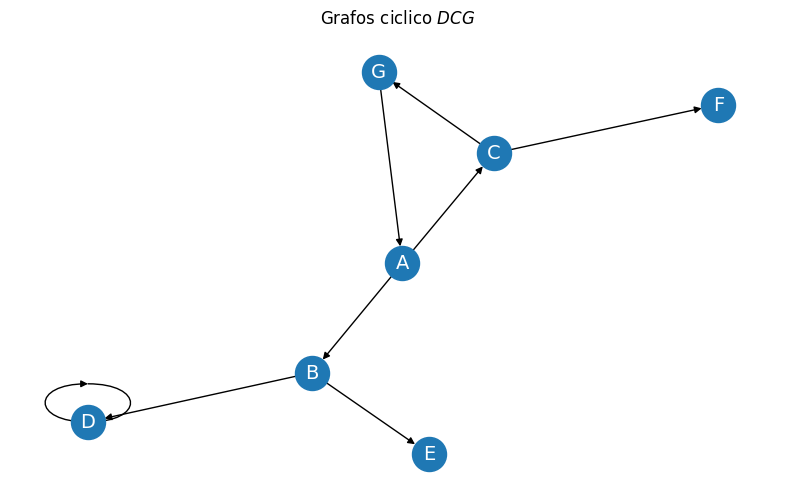

In [69]:
DCG = nx.DiGraph()
DCG.add_edges_from([
    ('A', 'B'), 
    ('A', 'C'), 
    ('B', 'D'), 
    ('B', 'E'), 
    ('C', 'F'), 
    ('C', 'G'),
    ('D', 'D'),
    ('G', 'A')]
)

fig = plt.figure(figsize=(10, 6))
plt.axis('off')
plt.title("Grafos ciclico $DCG$")
nx.draw_networkx(
    DCG,
    pos=nx.spring_layout(G, seed=1),
    node_size=600,
    cmap='coolwarm',
    font_size=14,
    font_color='white'
)
DCG_adj = pd.DataFrame(nx.to_numpy_array(DCG))
DCG_adj.index = pd.Series(list('ABCDEFG'))
DCG_adj.rename(columns={k:v for k, v in zip(range(7), 'ABCDEFG')}, inplace=True)

### Matriz de adjacencia para grafo ciclico dirigido DCG

In [38]:
DCG_adj

,A,B,C,D,E,F,G
A,0.0,1.0,1.0,0.0,0.0,0.0,0.0
B,0.0,0.0,0.0,1.0,1.0,0.0,0.0
C,0.0,0.0,0.0,0.0,0.0,1.0,1.0
D,0.0,0.0,0.0,1.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Matriz de grado del grafo DCG

In [50]:
import numpy as np

num_nodes = len(DCG.out_degree())
degree_matrix = np.zeros((num_nodes, num_nodes))
degrees = DCG.degree()
for i in range(num_nodes):
    for nd, j in zip(degrees, range(num_nodes)):
        if i == j:
            degree_matrix[i][j] = nd[1]

degree_matrix = pd.DataFrame(degree_matrix)
degree_matrix.index = pd.Series(list('ABCDEFG'))
degree_matrix.rename(columns={k:v for k, v in zip(range(7), 'ABCDEFG')}, inplace=True)
degree_matrix

,A,B,C,D,E,F,G
A,3.0,0.0,0.0,0.0,0.0,0.0,0.0
B,0.0,3.0,0.0,0.0,0.0,0.0,0.0
C,0.0,0.0,3.0,0.0,0.0,0.0,0.0
D,0.0,0.0,0.0,3.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,0.0,1.0,0.0
G,0.0,0.0,0.0,0.0,0.0,0.0,2.0


### Mismo Grafo, visualización diferente

Text(0.5, 1.0, 'Grafo $G$ visualización 2')

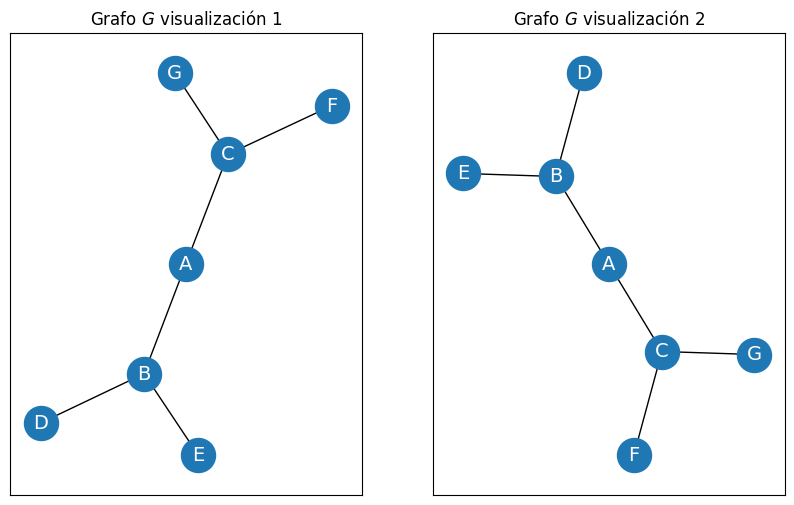

In [65]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

nx.draw_networkx(
    G,
    pos=nx.spring_layout(G, seed=1),
    node_size=600,
    cmap='coolwarm',
    font_size=14,
    font_color='white',
    ax=axes[0]
)
axes[0].set_title('Grafo $G$ visualización 1')

nx.draw_networkx(
    G,
    pos=nx.kamada_kawai_layout(G),
    node_size=600,
    cmap='coolwarm',
    font_size=14,
    font_color='white',
    ax=axes[1]
)
axes[1].set_title('Grafo $G$ visualización 2')